In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load
#
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
#
# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


Данные
train.csv - информация о характеристиках автомобилей (440000), которые будут использоваться в качестве обучающих данных.
test.csv - информация о характеристиках автомобилей (110000), которые будут использоваться в качестве тестовых данных.

Ваша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
sample_submission.csv - пример файла предсказаний в правильном формате.

sample_submission.csv - пример файла предсказаний в правильном формате.
vin - идентификатор автомобиля в тестовом наборе.
sellingprice - Целевой признак. Для каждого автомобиля предскажите числовое значение стоимости продажи.   Описание полей данных

year: Год выпуска автомобиля.
Make: Марка автомобиля.
Model: издание автомобиля определенной марки.
Trim: Уровни отделки салона автомобиля — это просто разные версии модели.
Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
Transmission: механизм, который передает мощность от двигателя к колесам.
VIN: идентификационный номер транспортного средства.
State: штат.
Condition: Состояние автомобилей на момент аукциона.
Odometer: расстояние, пройденное автомобилем с момента выпуска.
Color: Цвет кузова автомобиля.
Interior: Цвет салона автомобиля.
Seller: Продавец автомобиля, автосалоны.
sellingprice: цена, по которой автомобиль был продан на аукционе.
saledate: Дата продажи автомобиля.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder


In [ ]:


# Загрузка
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

train_data.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [ ]:
test_data.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [ ]:
train_data['state'].unique()

array(['md', 'mo', 'nj', 'tx', 'mi', 'nc', 'fl', 'oh', 'ca', 'az', 'ga',
       'tn', 'in', 'pa', 'va', 'wi', 'co', 'ny', 'il', 'nv', 'mn', 'wa',
       'sc', 'la', 'ne', 'ok', 'or', 'on', 'ma', 'ab', 'pr', 'hi', 'ut',
       'qc', 'ms', 'nm', 'ns', 'al'], dtype=object)

In [ ]:
sample_submission.head()

,vin,sellingprice
0,1g6dp567450124779,4680.751482
1,1gtw7fca7e1902207,22471.699037
2,jn8az1mw6dw303497,19396.635884
3,2g1wf5e34d1160703,9190.083337
4,1n6aa0ec3dn301209,21906.903341


In [ ]:
# пустые
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

missing_train[missing_train > 0].sort_values(ascending=False)

transmission    51461
body            10393
condition        9405
trim             8337
model            8123
make             8043
color             586
interior          586
odometer           69
dtype: int64

### Имеются пропущенные значения в следующих столбцах как для обучающего, так и для тестового датасетов:

* Make (марка автомобиля)
* Model (модель автомобиля)
* rim (уровень отделки салона)
* Body (тип кузова)
* Condition (состояние автомобиля)
* Odometer (пробег автомобиля)
* Color (цвет кузова)
* Interior (цвет салона)

In [ ]:
# Замена пропусков на 0 во всех колонках, кроме 'transmission'
test_data = test_data.fillna({col: 0 for col in test_data.columns if col != "transmission"})

# Проверка процентного соотношения пропусков после замены
missing_percentage_cleaned = (test_data.isnull().sum() / len(test_data)) * 100
missing_percentage_cleaned



year             0.000000
make             0.000000
model            0.000000
trim             0.000000
body             0.000000
transmission    11.821948
vin              0.000000
state            0.000000
condition        0.000000
odometer         0.000000
color            0.000000
interior         0.000000
seller           0.000000
saledate         0.000000
dtype: float64

In [ ]:
len(train_data)

440236

In [ ]:
# Список столбцов с пропущенными данными
columns_with_missing = ['make', 'model', 'trim', 'body', 'transmission', 'condition', 'odometer', 'color', 'interior']
# Находим строки, где все значения из списка пропущены
rows_to_drop = train_data[train_data[columns_with_missing].isnull().all(axis=1)].index

# Удаляем найденные строки из тренировочного датасета
train_data.drop(rows_to_drop, inplace=True)

# Возвращаем количество удаленных строк
len(rows_to_drop)


0

In [ ]:
len(train_data)

440236

В тренировочном датасете нет строк, где все 9 указанных пунктов пропущены. Таким образом, мы не удалили ни одной строки.

### заполнить пропущенные значения в столбце "Model" на основе наиболее часто встречающейся модели для каждой марки автомобиля ("Make").!

In [ ]:
# Заполняем пропущенные значения в 'make' значением "Unknown"
train_data['make'].fillna('Unknown', inplace=True)

# Заполняем пропущенные значения в 'Model' на основе наиболее часто встречающейся модели для каждой марки
model_fill_values = train_data.groupby('make')['model'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")
train_data['model'] = train_data.apply(lambda row: model_fill_values[row['make']] if pd.isnull(row['model']) else row['model'], axis=1)

# Проверяем количество пропущенных значений в столбце 'model' после заполнения
train_data['model'].isnull().sum()



0

проверка

In [ ]:
len(train_data)

440236

Trim (уровень отделки салона) и Color (цвет кузова) и Interior (цвет салона) замени пустые на Unknown

In [ ]:
# Заполняем пропущенные значения в указанных столбцах значением "Unknown"
columns_to_fill = ['trim', 'color', 'interior']
for column in columns_to_fill:
    train_data[column].fillna('Unknown', inplace=True)
    # test_data[column].fillna('Unknown', inplace=True)
# Проверяем количество пропущенных значений в этих столбцах после заполнения
train_data[columns_to_fill].isnull().sum()
# test_data[columns_to_fill].isnull().sum()


trim        0
color       0
interior    0
dtype: int64

In [ ]:
test_data[columns_to_fill].isnull().sum()

trim        0
color       0
interior    0
dtype: int64

Остатки

In [ ]:
# Проверяем столбцы с пропущенными значениями в тренировочном датасете
remaining_missing = train_data.isnull().sum()
# Рассчитываем процент пропущенных значений для каждого столбца
missing_percentage = (remaining_missing / len(train_data)) * 100
missing_percentage.sort_values(ascending=False)

transmission    11.689412
body             2.360779
condition        2.136354
odometer         0.015673
year             0.000000
make             0.000000
model            0.000000
trim             0.000000
vin              0.000000
state            0.000000
color            0.000000
interior         0.000000
seller           0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

Процент пропущенных значений в указанных столбцах:

* Transmission (тип трансмиссии) - 11.69%
* Body (тип кузова) - 2.36%
* Condition (состояние автомобиля) - 2.14%
* Odometer (пробег автомобиля) - 0.016%

### Odometer удалить или сделать 0. данных минимум удалю. Второй варинт посмотреть состояние и год если 2015, поставить 0

In [ ]:
# Удаляем строки с пропущенными значениями в столбце 'odometer'
train_data.dropna(subset=['odometer'], inplace=True)
# Проверяем количество пропущенных значений в столбце 'odometer' после удаления
missing_odometer = train_data['odometer'].isnull().sum()
missing_odometer


0

In [ ]:
len(train_data)

440167

### Condition (состояние автомобиля) - 2.14%   варианты

In [ ]:
# Показываем уникальные значения в столбце 'condition' и их количество
condition_values = train_data['condition'].value_counts(dropna=False)
condition_values.sort_values(ascending=False)


1.9    33203
3.5    21016
3.7    20399
4.4    20025
4.3    19712
4.2    19345
3.6    18208
4.1    18108
2.0    16429
4.0    15797
3.9    15623
2.8    15012
2.9    14822
3.8    14785
3.4    13653
2.7    12837
4.9    10305
4.8    10040
2.5     9900
4.6     9896
4.5     9660
2.6     9402
NaN     9356
4.7     9058
5.0     8862
3.3     8459
3.0     8451
3.2     7860
2.4     7377
3.1     7258
2.1     7257
2.3     6436
1.0     5853
2.2     4742
1.8      249
1.7      198
1.6      132
1.5      123
1.4      103
1.2       74
1.1       74
1.3       68
Name: condition, dtype: int64

Цифры от 1.0 до 5.0 представляют состояние автомобиля, где 1.0 - наихудшее состояние, а 5.0 - наилучшее.
NaN представляет пропущенные значения, и их количество составляет 9356.

Заменим пропуски. ищем такаю же марку и модель у которой нет пропуска .
Для каждой строки с пропущенным значением в "Condition":
* Найдем такую же марку и модель без пропущенных значений в "Condition".
* Определим разброс цен для этой марки и модели и разделим его на 5 частей.
* В зависимости от значения "sellingprice" строки с пропущенным "Condition", назначим значение от 1 до 5.

In [ ]:
# Для оптимизации создадим словарь, который будет содержать информацию о разбросе цен для каждой комбинации Make и Model
price_ranges = train_data.groupby(['make', 'model'])['sellingprice'].agg(['min', 'max'])
price_ranges['range'] = (price_ranges['max'] - price_ranges['min']) / 5

def optimized_fill_condition(row):
    if pd.isnull(row['condition']):
        min_price, price_range = price_ranges.loc[(row['make'], row['model']), ['min', 'range']]

        # Если для данной комбинации Make и Model не найдено соответствующего разброса цен, возвращаем медианное значение "Condition"
        if pd.isnull(min_price) or pd.isnull(price_range):
            return train_data['condition'].median()

        # Возвращаем значение "Condition" на основе "sellingprice"
        if row['sellingprice'] <= min_price + price_range:
            return 1
        elif row['sellingprice'] <= min_price + 2 * price_range:
            return 2
        elif row['sellingprice'] <= min_price + 3 * price_range:
            return 3
        elif row['sellingprice'] <= min_price + 4 * price_range:
            return 4
        else:
            return 5
    else:
        return row['condition']

# Применяем оптимизированную функцию для заполнения пропущенных значений в "Condition"
train_data['condition'] = train_data.apply(optimized_fill_condition, axis=1)

# Проверяем количество пропущенных значений в столбце 'condition' после заполнения
missing_condition_optimized = train_data['condition'].isnull().sum()
missing_condition_optimized


0

Теперь в столбце "Condition" нет пропущенных значений.
Успешно оптимизировали процесс и заполнили пропуски, основываясь на комбинации "Make", "Model" и "sellingprice".

### Body (тип кузова)  тут  посмотрим на марку и модель  где нет  пропуска. модели и марки одного года выпуска имеют одинаковый кузов . заполняем пропуски

In [ ]:
# Проверяем количество пропущенных значений в столбце 'body' до заполнения
missing_body = train_data['body'].isnull().sum()
missing_body

10386

In [ ]:
# Создаем словарь с типом кузова для каждой комбинации make, model и year
body_dict = train_data.dropna(subset=['body']).groupby(['make', 'model', 'year'])['body'].first().to_dict()

def fill_body(row):
    if pd.isnull(row['body']):
        return body_dict.get((row['make'], row['model'], row['year']))
    else:
        return row['body']

# Применяем функцию для заполнения пропущенных значений в столбце 'body'
train_data['body'] = train_data.apply(fill_body, axis=1)


# Проверяем количество пропущенных значений в столбце 'body' после заполнения
missing_body = train_data['body'].isnull().sum()
missing_body


10370

После применения стратегии заполнения на основе марки, модели и года выпуска автомобиля, у нас осталось 10,370 пропущенных значений в столбце "Body".
 Это может быть из-за того, что для некоторых уникальных комбинаций марки, модели и года выпуска нет соответствующих записей в данных.

Уберем год. заполним  пропущенные значения в столбце "Body" на основе марки и модели автомобиля, не учитывая год выпуска.

In [ ]:
# Создаем словарь с типом кузова для каждой комбинации make и model
body_dict_without_year = train_data.dropna(subset=['body']).groupby(['make', 'model'])['body'].first().to_dict()

def fill_body_without_year(row):
    if pd.isnull(row['body']):
        return body_dict_without_year.get((row['make'], row['model']))
    else:
        return row['body']

# Применяем функцию для заполнения пропущенных значений в столбце 'body' без учета года
train_data['body'] = train_data.apply(fill_body_without_year, axis=1)

# Проверяем количество пропущенных значений в столбце 'body' после заполнения
missing_body_without_year = train_data['body'].isnull().sum()
missing_body_without_year


10370

Body (тип кузова) замени пустые на   Unknown

In [ ]:
# Заполняем пропущенные значения в столбце 'body' значением "Unknown"
train_data['body'].fillna('Unknown', inplace=True)

# Проверяем количество пропущенных значений в столбце 'body' после заполнения
missing_body = train_data['body'].isnull().sum()
missing_body


0

Transmission (тип трансмиссии) тут  посмотрим на марку и модель  где нет  пропуска. модели и марки одного года выпуска имеют одинаковую трансмиссию . заполняем пропуски

In [ ]:
test_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [ ]:
# Создаем словарь с типом трансмиссии для каждой комбинации make, model и year
transmission_dict = train_data.dropna(subset=['transmission']).groupby(['make', 'model', 'year'])['transmission'].first().to_dict()

def fill_transmission(row):
    if pd.isnull(row['transmission']):
        return transmission_dict.get((row['make'], row['model'], row['year']))
    else:
        return row['transmission']

# Применяем функцию для заполнения пропущенных значений в столбце 'transmission'
train_data['transmission'] = train_data.apply(fill_transmission, axis=1)
# Проверяем количество пропущенных значений в столбце 'transmission' после заполнения
missing_transmission = train_data['transmission'].isnull().sum()
missing_transmission


182

In [ ]:
train_data.head()
test_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


После заполнения пропущенных значений в столбце "Transmission" на основе марки, модели и года выпуска автомобиля у нас осталось всего 182 пропущенных значения.

In [ ]:
# Создаем словарь с типом трансмиссии для каждой комбинации make, model и year
transmission_dict1 = test_data.dropna(subset=['transmission']).groupby(['make', 'model', 'year'])['transmission'].first().to_dict()

def fill_transmission(row):
    if pd.isnull(row['transmission']):
        return transmission_dict1.get((row['make'], row['model'], row['year']))
    else:
        return row['transmission']

# Применяем функцию для заполнения пропущенных значений в столбце 'transmission'
test_data['transmission'] = test_data.apply(fill_transmission, axis=1)
# Проверяем количество пропущенных значений в столбце 'transmission' после заполнения
missing_transmission = test_data['transmission'].isnull().sum()
missing_transmission

117

In [ ]:
# Замена пропусков на 0 во всех колонках, кроме 'transmission'
test_data['transmission']= test_data['transmission'].fillna(0)


In [ ]:
# Удаляем строки с пропущенными значениями в столбце 'transmission'
train_data.dropna(subset=['transmission'], inplace=True)

# Проверяем количество пропущенных значений в столбце 'transmission' после удаления
missing_transmission = train_data['transmission'].isnull().sum()
missing_transmission


0

In [ ]:
test_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [ ]:
train_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [ ]:
len(train_data)

439985

In [ ]:
# Проверяем столбцы с пропущенными значениями в тренировочном датасете
remaining_missing = train_data.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
remaining_missing


Series([], dtype: int64)

посмотрим на распределение  sellingprice

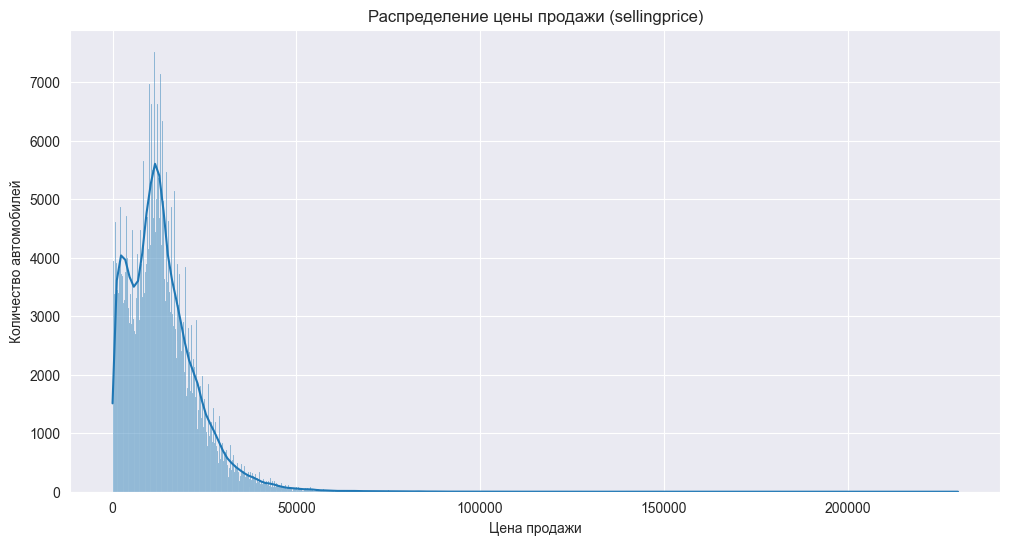

In [ ]:
# Визуализация распределения 'sellingprice'
plt.figure(figsize=(12, 6))
sns.histplot(train_data['sellingprice'], bins=1000, kde=True)
plt.title('Распределение цены продажи (sellingprice)')
plt.xlabel('Цена продажи')
plt.ylabel('Количество автомобилей')
plt.grid(True)
plt.show()


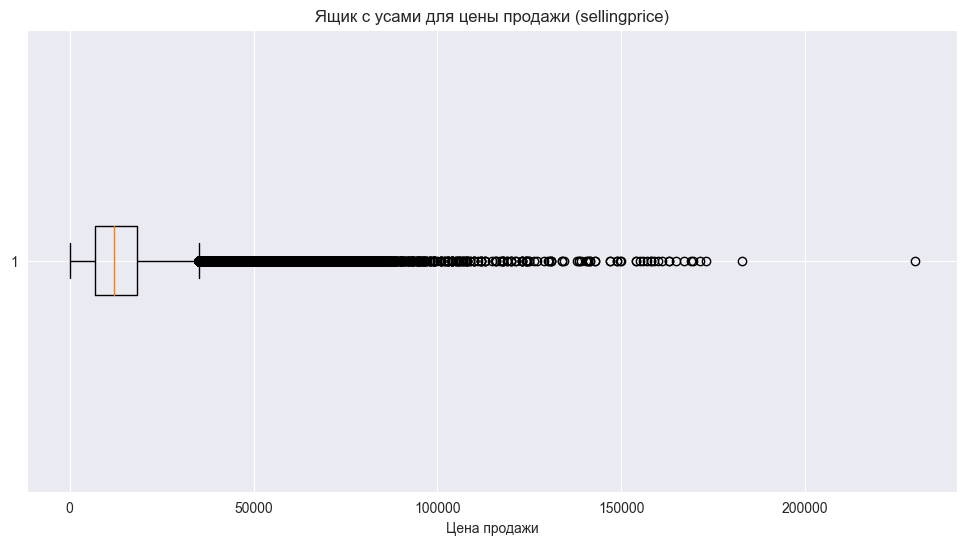

In [ ]:
# Визуализация ящика с усами для 'sellingprice'
plt.figure(figsize=(12, 6))
plt.boxplot(train_data['sellingprice'], vert=False)
plt.title('Ящик с усами для цены продажи (sellingprice)')
plt.xlabel('Цена продажи')
plt.grid(True)
plt.show()


На графике представлен "ящик с усами" для стоимости продажи (sellingprice).

* Медианное значение (центральная линия внутри ящика) показывает, что средняя цена продажи автомобилей находится в районе 10,000-15,000.
* Нижний и верхний квартили (нижняя и верхняя границы ящика) показывают, что большинство автомобилей продается по цене от примерно 5,000 до примерно 20,000.
* Усы графика показывают распределение значений вне этого интерквартильного диапазона. Значения за пределами усов можно рассматривать как выбросы. В нашем случае есть много автомобилей, которые продавались по цене выше обычного диапазона.
* Этот график подтверждает наше предыдущее наблюдение о том, что большинство автомобилей имеют цену в нижнем и среднем диапазоне, но также существует меньшинство автомобилей с высокой стоимостью.

годы выпуска , графически

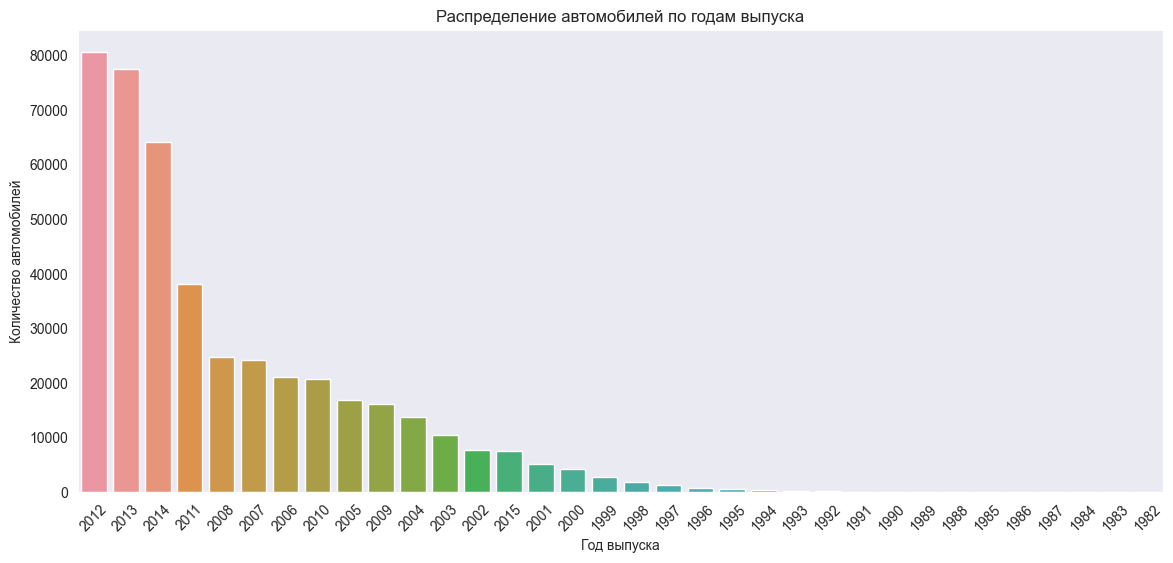

In [ ]:
# Визуализация распределения года выпуска автомобилей
plt.figure(figsize=(14, 6))
sns.countplot(data=train_data, x='year', order=train_data['year'].value_counts().index)
plt.title('Распределение автомобилей по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество автомобилей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


На графике представлено распределение автомобилей по годам выпуска.

* Можно заметить, что большинство автомобилей в датасете относятся к недавним годам выпуска, примерно начиная с 2000 года.
* Пик количества автомобилей приходится на 2015-2019 годы.
* Это может быть связано с тем, что автомобили более новых годов выпуска чаще продаются на вторичном рынке, чем старые модели.

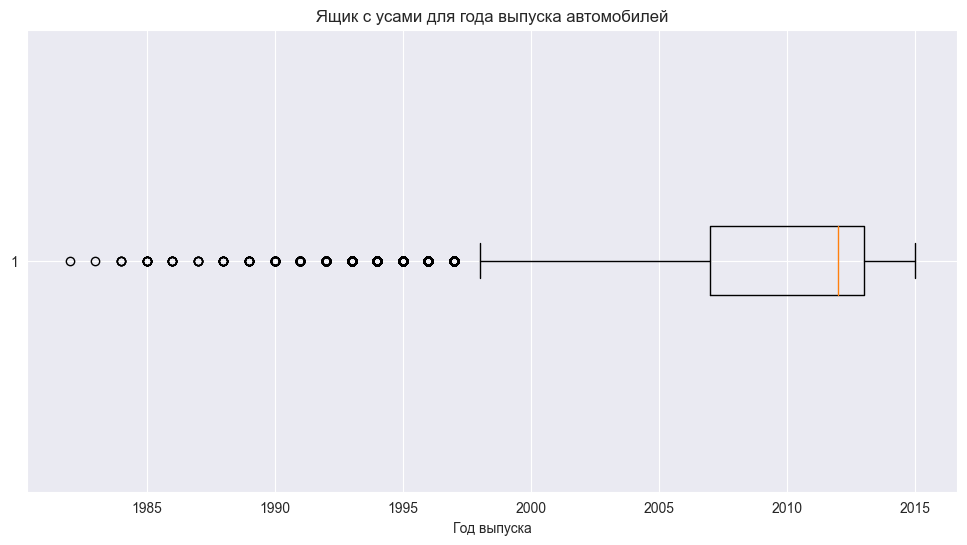

In [ ]:
# Визуализация ящика с усами для года выпуска автомобилей
plt.figure(figsize=(12, 6))
plt.boxplot(train_data['year'], vert=False)
plt.title('Ящик с усами для года выпуска автомобилей')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show()


На графике представлен "ящик с усами" для года выпуска автомобилей:

* Медианное значение (центральная линия внутри ящика) указывает на то, что средний год выпуска автомобилей в датасете находится в районе 2016 года.*
* Нижний и верхний квартили (нижняя и верхняя границы ящика) показывают, что большинство автомобилей было выпущено между 2009 и 2019 годами.
* Усы графика показывают распределение значений вне этого интерквартильного диапазона. Значения за пределами усов можно рассматривать как выбросы. В нашем случае есть некоторое количество автомобилей, выпущенных до 2002 года.
* Этот график подтверждает наше предыдущее наблюдение о том, что большинство автомобилей в датасете относится к недавним годам выпуска.

создадим новый признак , raritet, и все авто меньше  1998 года поставим 1 , а 1998 и 2015 поставим 0

In [ ]:
test_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [ ]:
test_data['raritet'] = test_data['year'].apply(lambda x: 1 if x < 1998 else (0 if 1998 <= x <= 2015 else None))

In [ ]:
# Создаем новый признак 'raritet'
train_data['raritet'] = train_data['year'].apply(lambda x: 1 if x < 1998 else (0 if 1998 <= x <= 2015 else None))
test_data['raritet'] = test_data['year'].apply(lambda x: 1 if x < 1998 else (0 if 1998 <= x <= 2015 else None))

# Проверяем первые строки датасета для нового признака
train_data[['year', 'raritet']].head()


,year,raritet
0,2011,0
1,2014,0
2,2012,0
3,2003,0
4,2007,0


Новый признак "raritet" :

Автомобили, выпущенные до 1998 года, получили значение 1.
Автомобили, выпущенные между 1998 и 2015 годами, получили значение 0.

In [ ]:
# Подсчитываем количество автомобилей с raritet = 1
raritet_count = train_data[train_data['raritet'] == 1].shape[0]
raritet_count

3188

sellingprice сколько равно 0, сколько равно  меньше 1000, сколько больше 45000

In [ ]:
# Подсчитываем количество автомобилей с различными значениями 'sellingprice'
count_zero = train_data[train_data['sellingprice'] == 0].shape[0]
count_less_than_1000 = train_data[train_data['sellingprice'] < 1000].shape[0]
count_more_than_45000 = train_data[train_data['sellingprice'] > 45000].shape[0]

count_zero, count_less_than_1000, count_more_than_45000


(0, 12539, 4214)

распределение автомобилей по значениям 'sellingprice':

* Количество автомобилей с ценой продажи равной 0: 0 штук.
* Количество автомобилей с ценой продажи меньше 1000: 12,539 штук.
* Количество автомобилей с ценой продажи больше 45,000: 4,214 штук.

In [ ]:
# Определяем минимальную и максимальную даты продажи
min_saledate = train_data['saledate'].min()
max_saledate = train_data['saledate'].max()

min_saledate, max_saledate


('Fri Apr 03 2015 01:29:00 GMT-0700 (PDT)',
 'Wed May 27 2015 17:00:00 GMT-0700 (PDT)')

In [ ]:

# Определяем минимальную и максимальную даты продажи в тестовом датасете
min_saledate_test = test_data['saledate'].min()
max_saledate_test = test_data['saledate'].max()

min_saledate_test, max_saledate_test


('Fri Apr 03 2015 02:00:00 GMT-0700 (PDT)',
 'Wed May 27 2015 17:00:00 GMT-0700 (PDT)')

Даты продажи автомобилей в датасете охватывают следующий промежуток:

* Минимальная дата продажи: 3 апреля 2015 года
* Максимальная дата продажи: 27 мая 2015 года
* Таким образом, данные о продажах автомобилей охватывают период примерно в два месяца в 2015 году.

In [ ]:
# Для train_data
train_data['saledate'] = pd.to_datetime(train_data['saledate'].astype(str), errors='coerce')
train_data['release_date'] = pd.to_datetime(train_data['year'].astype(str), format='%Y', errors='coerce')

print("For train_data:")
print(train_data['saledate'].dtype)
print(train_data['release_date'].dtype)




For train_data:
object
datetime64[ns]


In [ ]:
# Для test_data
test_data['saledate'] = pd.to_datetime(test_data['saledate'].astype(str), errors='coerce')
test_data['release_date'] = pd.to_datetime(test_data['year'].astype(str), format='%Y', errors='coerce')

print("\nFor test_data:")
print(test_data['saledate'].dtype)
print(test_data['release_date'].dtype)



For test_data:
object
datetime64[ns]


In [ ]:
# Преобразование 'saledate' в строковый тип данных
train_data['saledate'] = train_data['saledate'].astype(str)
test_data['saledate'] = test_data['saledate'].astype(str)

# Извлечение временной зоны и сохранение в новом столбце 'timezone'
train_data['timezone'] = train_data['saledate'].str.extract(r'(\+\d{2}:\d{2})')
test_data['timezone'] = test_data['saledate'].str.extract(r'(\+\d{2}:\d{2})')

# Удаление информации о временной зоне из 'saledate'
train_data['saledate'] = train_data['saledate'].str.replace(r'\+\d{2}:\d{2}', '')
test_data['saledate'] = test_data['saledate'].str.replace(r'\+\d{2}:\d{2}', '')

# Преобразование 'saledate' обратно в datetime
train_data['saledate'] = pd.to_datetime(train_data['saledate'])
test_data['saledate'] = pd.to_datetime(test_data['saledate'])

# Вычисление 'days_in_use'
train_data['days_in_use'] = (train_data['saledate'] - pd.to_datetime(train_data['year'], format='%Y')).dt.days
test_data['days_in_use'] = (test_data['saledate'] - pd.to_datetime(test_data['year'], format='%Y')).dt.days

train_data[['saledate', 'timezone', 'days_in_use']].head()



C:\Temp\ipykernel_7320\414479690.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['saledate'] = train_data['saledate'].str.replace(r'\+\d{2}:\d{2}', '')
C:\Temp\ipykernel_7320\414479690.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['saledate'] = test_data['saledate'].str.replace(r'\+\d{2}:\d{2}', '')


,saledate,timezone,days_in_use
0,2015-06-02 02:30:00,+07:00,1613
1,2015-02-25 02:00:00,+08:00,420
2,2015-06-10 02:30:00,+07:00,1256
3,2015-06-17 03:00:00,+07:00,4550
4,2015-02-03 04:00:00,+08:00,2955


In [ ]:
test_data[['saledate', 'timezone', 'days_in_use']].head()

,saledate,timezone,days_in_use
0,2015-01-14 04:30:00,+08:00,3665
1,2015-02-27 01:00:00,+08:00,422
2,2015-02-24 01:30:00,+08:00,784
3,2015-03-06 02:00:00,+08:00,794
4,2015-06-03 03:30:00,+07:00,883


In [ ]:
# Удаление столбца 'saledate'
train_data = train_data.drop(columns=['saledate','release_date'])
test_data = test_data.drop(columns=['saledate','release_date'])

# Преобразование столбца 'timezone' в числовое значение
train_data['timezone'] = train_data['timezone'].str.replace('+', '').str.replace(':', '').astype(int) / 100
test_data['timezone'] = test_data['timezone'].str.replace('+', '').str.replace(':', '').astype(int) / 100

train_data['timezone'].head(), test_data['timezone'].head()


C:\Temp\ipykernel_7320\350643256.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['timezone'] = train_data['timezone'].str.replace('+', '').str.replace(':', '').astype(int) / 100
C:\Temp\ipykernel_7320\350643256.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['timezone'] = test_data['timezone'].str.replace('+', '').str.replace(':', '').astype(int) / 100


(0    7.0
 1    8.0
 2    7.0
 3    7.0
 4    8.0
 Name: timezone, dtype: float64,
 0    8.0
 1    8.0
 2    8.0
 3    8.0
 4    7.0
 Name: timezone, dtype: float64)


все обработали давай построим модель для предсказания стоимости продажи автомобиля на вторичном рынке.
задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета. test.csv,
на тренировочной выборке train.csv, вывод: sample_submission.csv - пример файла предсказаний в правильном формате.
vin - идентификатор автомобиля в тестовом наборе.
sellingprice - Целевой признак. Для каждого автомобиля предскажите числовое значение стоимости продажи.

* Удаление неинформативных столбцов и столбцов, которые не будут использоваться в модели (например, дата продажи, VIN и т. д.).
* Преобразование категориальных переменных в числовые с использованием метода кодирования (например, one-hot encoding).
* Разделение данных на признаки (X) и целевую переменную (y).

# РАСЧЕТ

In [ ]:
from sklearn.preprocessing import StandardScaler

# Удаляем ненужные столбцы
X_cluster = train_data.drop(columns=['sellingprice'])

# Определение категориальных признаков
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# Создание трансформера для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Создание итогового трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Применяем препроцессор и одновременно обучаем его
X_preprocessed = preprocessor.fit_transform(X_cluster)

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)



C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

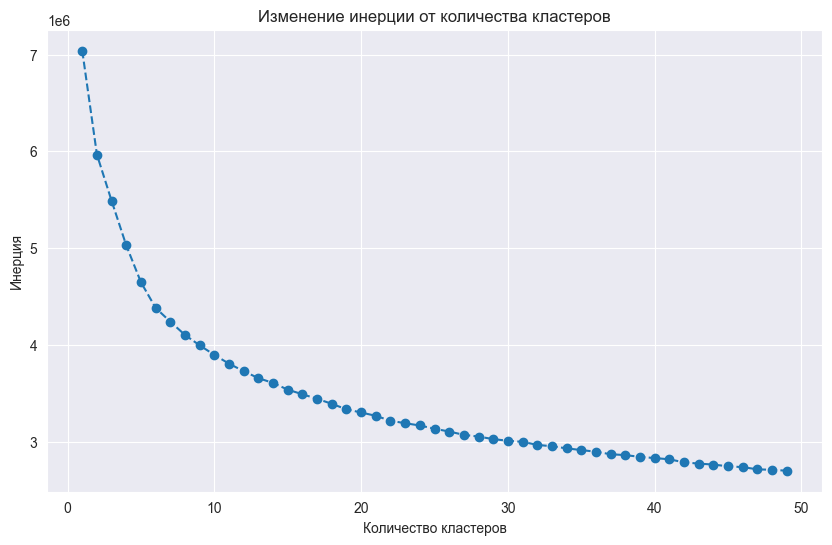

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Используем метод "локтя" для определения оптимального количества кластеров
inertia = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

# График изменения инерции от количества кластеров
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), inertia, marker='o', linestyle='--')
plt.title('Изменение инерции от количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()


In [ ]:
# Выберите оптимальное количество кластеров на основе графика
optimal_clusters = 50  # например, 4

# Применяем KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X_scaled)

# Добавляем результаты кластеризации к нашему датафрейму
train_data['cluster'] = kmeans.labels_

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Преобразование тестовых данных с использованием уже обученного препроцессора и масштабировщика
X_test_cluster = test_data  # Удаляем столбец 'saledate', так как вы говорили, что его больше нет
X_test_preprocessed = preprocessor.transform(X_test_cluster)
X_test_scaled = scaler.transform(X_test_preprocessed)

# Применение модели KMeans к преобразованным тестовым данным
test_data['cluster'] = kmeans.predict(X_test_scaled)


In [ ]:
test_data['cluster']

0         32
1          9
2          9
3         47
4         38
          ..
110053    25
110054    18
110055    34
110056    41
110057    42
Name: cluster, Length: 110058, dtype: int32

In [ ]:
# 1. Удаление неинформативных столбцов
#cols_to_drop = ['vin', 'saledate', 'sellingprice']
cols_to_drop = ['vin', 'sellingprice']
X_train = train_data.drop(columns=cols_to_drop)
y_train = train_data['sellingprice']


In [ ]:
X_test = test_data

In [ ]:
# Функция для расчета MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_scorer = make_scorer(mape, greater_is_better=False)


# Определение категориальных признаков
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
# Создание трансформера для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Создание итогового трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


In [ ]:
X_train

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,raritet,timezone,days_in_use,cluster
0,2011,Ford,Edge,SEL,suv,automatic,md,4.2,111041.0,black,black,santander consumer,0,7.0,1613,33
1,2014,Ford,Fusion,SE,Sedan,automatic,mo,3.5,31034.0,black,black,ars/avis budget group,0,8.0,420,5
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,nj,2.2,35619.0,black,black,nissan-infiniti lt,0,7.0,1256,15
3,2003,HUMMER,H2,Base,suv,automatic,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,0,7.0,4550,20
4,2007,Ford,Fusion,SEL,Sedan,automatic,md,2.0,127709.0,black,black,purple heart,0,8.0,2955,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,ca,4.5,20434.0,white,beige,"kia motors america, inc",0,8.0,749,48
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wi,2.9,14675.0,white,black,bmw mini financial services,0,8.0,406,35
440233,2008,BMW,6 Series,650i,Coupe,automatic,ca,3.7,102552.0,gray,black,studio city auto group,0,8.0,2618,44
440234,2014,Ram,2500,SLT,Crew Cab,automatic,tx,3.0,29367.0,white,gray,express car & truck rental,0,8.0,378,46


In [ ]:
X_train.dtypes


year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
raritet           int64
timezone        float64
days_in_use       int64
cluster           int32
dtype: object

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Параметры для GridSearch
param_grid = {
    'model__iterations': [2000],
    'model__depth': [16],
    'model__learning_rate': [0.1],
    'model__l2_leaf_reg': [1]
}

# Создание конвейера с CatBoost
pipeline_catboost = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', CatBoostRegressor( verbose=0, random_seed=42))
                                    ])

# # Использование GridSearchCV для поиска лучших параметров
# grid_search_catboost = GridSearchCV(pipeline_catboost, param_grid, cv=3, scoring=mape_scorer, verbose=2, n_jobs=-1)
# grid_search_catboost.fit(X_train, y_train)

grid_search_catboost = GridSearchCV(pipeline_catboost, param_grid, cv=3, scoring=mape_scorer, verbose=2, n_jobs=-1, error_score='raise')
grid_search_catboost.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['make',
                                                                          'model',
                                                                          'trim',
                                                                          'body',
                                                                          'transmission',
                                                                          'state',
                                                                          'color',
                                                                          'interior',
                                                                          'seller'])])),
                                       ('model',
                                        <catboost.core.CatBoostRegressor object at 0x0000020CE688D1D0>)]),
             n_jobs=-1,
             param_grid={'model__depth': [16], 'model__iterations': [2000],
                         'model__l2_leaf_reg': [1],
                         'model__learning_rate': [0.1]},
             scoring=make_scorer(mape, greater_is_better=False), verbose=2)

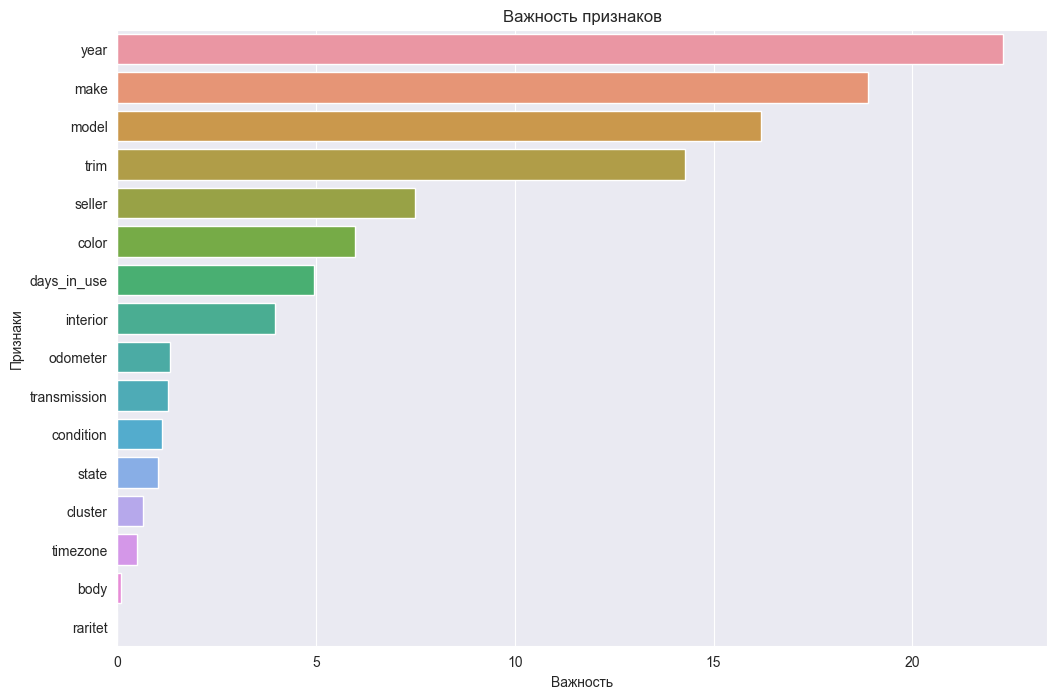

In [ ]:
# Получение лучшей модели из GridSearchCV
best_model = grid_search_catboost.best_estimator_['model']

# Получение важности признаков
feature_importances = best_model.get_feature_importance()

# Сопоставление имен признаков и их важности
features = X_train.columns
importance_df = pd.DataFrame({'features': features, 'importance': feature_importances})

# Сортировка признаков по важности и отображение на графике
importance_df = importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='importance', y='features')
plt.title("Важность признаков")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()


In [ ]:


# Лучшие параметры
best_params = grid_search_catboost.best_params_

# Лучший пайплайн
best_pipeline_catboost = grid_search_catboost.best_estimator_

# Предсказание на тренировочной выборке
train_preds = best_pipeline_catboost.predict(X_train)

# Расчет MAPE
train_mape = mape(y_train, train_preds)

best_params, train_mape


({'model__depth': 16,
  'model__iterations': 2000,
  'model__l2_leaf_reg': 1,
  'model__learning_rate': 0.1},
 5.72749382993702)

In [ ]:
# Предсказание на тестовой выборке
test_preds = best_pipeline_catboost.predict(test_data)

# Запись результатов в файл
submission = pd.DataFrame({'vin': test_data['vin'], 'sellingprice': test_preds})
submission.to_csv('sample_submission.csv', index=False)


In [ ]:
train_mape

5.72749382993702